# Initial Schedule 

Friday, 02.10.2020 (set up and get basic understanding)

- [x] set up the working environment (github, notebook etc.)
- [x] agree on working process and schedule
- [x] read into the topic, achieve basic understanding
- [x] do research, get deeper knowledge 
- [x] have a look into the data, basically understand the dataset
- [x] start the cleaning process

Monday, 05.10.2020 (Finish the data exploration and find hypotheses)
- [x] finish cleaning
- [ ] explore data by visualization, draw plots
- [ ] phrase questions & hypothesis to work on
- [ ] write down questions for review with coaches
- [ ] review with coaches at 2.20 - 2.40 pm
- [ ] gather most import information


Tuesday, 06.10.2020 (Predicition Modeling)
- [ ] create prediction models (at least 3) with optimal parameters
- [ ] create new features

Wednesday, 07.10.2020 (Summing up the results, preparing deliverables)
- [ ] beautify plots
- [ ] create final visualization

Thursay, 08.10.2020 - emergency buffer



## Deliverables 

Deadline: 08.10.2020, 11:00
- [ ] slides presentation (for non technical stake holders)
- [ ] PEP8 jupyternotebook on github

## Things to remember 

- Data Science Life Cycle

## Notes 

- age, gender, education, country, ethnicity: transform age to absolute values classes
- is there a correlation between the usage of 'soft drugs' to 'hard drugs' (soft: choc, caff, alc, cigarettes)
- in case one is using at least one drug, is it more likely that he'll use other drugs as well
- create a feature the stats if someone is probably addicted 



- create new features:
    - uses soft drug (without alcohol)  = 1 / 0    
- create label:
    - uses hard drug = 1 / 0
    
- prediction modeling:
    - baseline model without additional features

## Main question / hypothesis 

- we try to predict if one will get a user of hard drugs or if he would even try
- discuss how to consider ethnicity for calcutation?

## Review session with coaches

- when to use dummies / separation of categorial to conitnous values

- 

# Loading the data 

Clear namespace:

In [102]:
reset -fs

In [103]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from IPython.display import display_html
from IPython.display import display
from IPython.display import Image

# set ip magic command
%matplotlib inline

# set viz style
sns.set_theme(style="ticks")


In [104]:
# load the dataframe
data = pd.read_excel('data/drug_consumption.xls')

In [105]:
# check data structure
data.shape

(1885, 32)

**Dataset Informations:** 
- Database contains records for 1885 respondents. For each respondent 12 attributes are known: Personality measurements which include NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness), BIS-11 (impulsivity), and ImpSS (sensation seeking), level of education, age, gender, country of residence and ethnicity. 
- All input attributes are originally categorical and are quantified. After quantification values of all input features can be considered as real-valued. In addition, participants were questioned concerning their use of 18 legal and illegal drugs (alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine and volatile substance abuse and one fictitious drug (Semeron) which was introduced to identify over-claimers. For each drug they have to select one of the answers: never used the drug, used it over a decade ago, or in the last decade, year, month, week, or day.
- Database contains 18 classification problems. Each of independent label variables contains seven classes: "Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day"

In [106]:
# get first overview over the content
data.head().T

0        1        2        3        4
ID               1        2        3        4        5
Age        0.49788 -0.07854  0.49788 -0.95197  0.49788
Gender     0.48246 -0.48246 -0.48246  0.48246  0.48246
Education -0.05921  1.98437 -0.05921  1.16365  1.98437
Country    0.96082  0.96082  0.96082  0.96082  0.96082
Ethnicity    0.126 -0.31685 -0.31685 -0.31685 -0.31685
Nscore     0.31287 -0.67825 -0.46725 -0.14882  0.73545
Escore    -0.57545  1.93886  0.80523 -0.80615  -1.6334
Oscore    -0.58331  1.43533 -0.84732 -0.01928 -0.45174
Ascore    -0.91699  0.76096  -1.6209  0.59042 -0.30172
Cscore    -0.00665 -0.14277  -1.0145  0.58489  1.30612
Impulsive -0.21712 -0.71126 -1.37983 -1.37983 -0.21712
SS        -1.18084 -0.21575  0.40148 -1.18084 -0.21575
Alcohol        CL5      CL5      CL6      CL4      CL4
Amphet         CL2      CL2      CL0      CL0      CL1
Amyl           CL0      CL2      CL0      CL0      CL1
Benzos         CL2      CL0      CL0      CL3      CL0
Caff           CL6      CL6      CL6      CL5      CL6
Cannabis       CL0      CL4      CL3      CL2      CL3
Choc           CL5      CL6      CL4      CL4      CL6
Coke           CL0      CL3      CL0      CL2      CL0
Crack          CL0      CL0      CL0      CL0      CL0
Ecstasy        CL0      CL4      CL0      CL0      CL1
Heroin         CL0      CL0      CL0      CL0      CL0
Ketamine       CL0      CL2      CL0      CL2      CL0
Legalh         CL0      CL0      CL0      CL0      CL1
LSD            CL0      CL2      CL0      CL0      CL0
Meth           CL0      CL3      CL0      CL0      CL0
Shrooms        CL0      CL0      CL1      CL0      CL2
Nicotine       CL2      CL4      CL0      CL2      CL2
Semer          CL0      CL0      CL0      CL0      CL0
VSA            CL0      CL0      CL0      CL0      CL0

In [107]:
# investigate column names
data.columns

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Shrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')

The columns names and data description indicates that the features of the dataset are primarely grouped into three categories. For a further usage we name these three categories and assign the mathing columns to them:

In [108]:
general = data.columns[1:6]
psychometrics = data.columns[6:13]
drugs = data.columns[13:]
print(f'Each row of the dataset is indexed with an ID '
      f'and holds information about {len(general)} general '
      f'and {len(psychometrics)} psychometric features, '
      f'as well as about the usage frequency of {len(drugs)} drugs.'
     )

Each row of the dataset is indexed with an ID and holds information about 5 general and 7 psychometric features, as well as about the usage frequency of 19 drugs.


# Data Cleaning 

## Check for missing values 

In [109]:
data.isna().sum()

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Shrooms      0
Nicotine     0
Semer        0
VSA          0
dtype: int64

No missing values to deal with.

## Check for duplicates

In [110]:
# There is only the id column where duplicates could be of interest:

data.ID.duplicated().sum()

0

No ID duplicates to handle.

## Check for datatype consistency 

In [111]:
data.dtypes

ID             int64
Age          float64
Gender       float64
Education    float64
Country      float64
Ethnicity    float64
Nscore       float64
Escore       float64
Oscore       float64
Ascore       float64
Cscore       float64
Impulsive    float64
SS           float64
Alcohol       object
Amphet        object
Amyl          object
Benzos        object
Caff          object
Cannabis      object
Choc          object
Coke          object
Crack         object
Ecstasy       object
Heroin        object
Ketamine      object
Legalh        object
LSD           object
Meth          object
Shrooms       object
Nicotine      object
Semer         object
VSA           object
dtype: object

The dataset is indexed by a numerical ID. The drug-usage columns hold categorical values, while all other attributes were initially transformed to numerical distribution values. Therefore the type checking showed no anomalies to deal with.

## Value Transformation

As it's impossible to understand the meaning of the numerical transformation of the general data, we decided to translate to create an additional dataframe, holding the translations to the numerical values:

### Create new dataframe 

In [112]:
df = data.copy()

### Transform general data 

In [113]:
# change float value to str for dict accessing
df.Age = df.Age.astype(str)

# create dict from description data
age_dict = {
            '-0.95197' : '18-24',
            '-0.07854' : '25-34',
            '0.49788' : '35-44', 
            '1.09449' : '45-54',
            '1.82213' : '55-64',
            '2.59171' : '65+' 
            }

# replace values with dict data
df.Age = df.Age.replace(age_dict)

# check if only valid entries are left
df.Age.unique()

array(['35-44', '25-34', '18-24', '65+', '45-54', '55-64'], dtype=object)

In [114]:
df.Gender = df.Gender.astype(str)

gender_dict = {
            '0.48246' : 'Female', 
            '-0.48246':'Male'
            }

df['Gender'] = df.Gender.replace(gender_dict)
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [115]:
df.Education = df.Education.astype(str)

Education_dict = {
            '-2.43591' : 'Left school before 16 years',
            '-1.7379' : 'Left school at 16 years ',
            '-1.43719' : 'Left school at 17 years' ,
            '-1.22751' : 'Left school at 18 years ',
            '-0.61113' : 'Some college or university, no certificate or degree' ,
            '-0.05921' : 'Professional certificate/ diploma' ,
            '0.45468' : 'University degree' ,
            '1.16365' : 'Masters degree' ,
            '1.98437' : 'Doctorate degree' 
            }

df.Education = df.Education.replace(Education_dict)
df.Education.unique()

array(['Professional certificate/ diploma', 'Doctorate degree',
       'Masters degree', 'Left school at 18 years ',
       'Left school at 16 years ', 'University degree',
       'Some college or university, no certificate or degree',
       'Left school before 16 years', 'Left school at 17 years'],
      dtype=object)

In [116]:
df.Country = df.Country.astype(str)

Country_dict = {
            '-0.09765' : 'Australia',
            '0.24923' : 'Canada' ,
            '-0.46841' : 'New Zealand',
            '-0.28519' : 'Other',
            '0.21128' : 'Republic of Ireland',
            '0.96082' : 'UK',
            '-0.57009' : 'USA' 
            }

df.Country = df.Country.replace(Country_dict)
df.Country.unique()

array(['UK', 'Canada', 'USA', 'Other', 'Australia', 'Republic of Ireland',
       'New Zealand'], dtype=object)

In [117]:
df.Ethnicity = df.Ethnicity.astype(str)

Ethnicity_dict = {
            '-0.50212': 'Asian' ,
            '-1.10702' : 'Black' ,
            '1.90725' : 'Mixed-Black/Asian' ,
            '0.126' : 'Mixed-White/Asian' ,
            '-0.22166' : 'Mixed-White/Black' ,
            '0.1144' : 'Other' ,
            '-0.31685' : 'White' 
            }

df.Ethnicity = df.Ethnicity.replace(Ethnicity_dict)
df.Ethnicity.unique()

array(['Mixed-White/Asian', 'White', 'Other', 'Mixed-White/Black',
       'Asian', 'Black', 'Mixed-Black/Asian'], dtype=object)

### Transform psychometrics

**N-score (Neuroticism)**

In [118]:
# create dict
keys = np.sort(df.Nscore.unique())
values = [x for x in range(12,61)]    #range based on dataset description 
Nscore_dict = dict(zip(keys, values))

# replace values
df.Nscore = df.Nscore.replace(Nscore_dict)

# check if only valid entries are left
df.Nscore.unique()

array([39., 29., 31., 34., 43., 24., 42., 33., 26., 56., 28., 27., 19.,
       22., 41., 49., 32., 25., 40., 51., 35., 36., 46., 44., 37., 47.,
       23., 30., 38., 18., 45., 17., 53., 50., 60., 21., 54., 59., 48.,
       20., 55., 16., 57., 52., 58., 14., 15., 13., 12.])

**E-score (Extraversion)**

In [119]:
# create dict
keys = np.sort(df.Escore.unique())
values = [16] + [x for x in range(18,57)] + [58, 59]    #range based on dataset description 
Escore_dict = dict(zip(keys, values))

# replace values
df.Escore = df.Escore.replace(Escore_dict)

# check if only valid entries are left
df.Escore.unique()

array([36., 52., 45., 34., 28., 38., 32., 55., 40., 41., 49., 29., 31.,
       39., 27., 43., 33., 16., 44., 37., 51., 42., 48., 46., 47., 35.,
       50., 30., 26., 58., 53., 54., 23., 22., 24., 19., 20., 21., 25.,
       56., 59., 18.])

**O-score (Openess to experience)**

In [120]:
# create dict
keys = np.sort(df.Oscore.unique())
values = [24, 26] + [x for x in range(28,61)]    #range based on dataset description 
Oscore_dict = dict(zip(keys, values))

# replace values
df.Oscore = df.Oscore.replace(Oscore_dict)

# check if only valid entries are left
df.Oscore.unique()

array([42., 55., 40., 46., 43., 35., 39., 36., 38., 47., 49., 34., 44.,
       45., 29., 51., 37., 54., 24., 41., 52., 48., 28., 53., 32., 33.,
       26., 31., 50., 58., 30., 56., 57., 60., 59.])

**A-score (Agreeableness)**

In [121]:
# create dict
keys = np.sort(df.Ascore.unique())
values = [12, 16, 18] + [x for x in range(23,61)]    #range based on dataset description 
Ascore_dict = dict(zip(keys, values))

# replace values
df.Ascore = df.Ascore.replace(Ascore_dict)

# check if only valid entries are left
df.Ascore.unique()

array([37., 48., 32., 47., 41., 55., 38., 30., 49., 39., 36., 45., 40.,
       53., 50., 43., 33., 46., 51., 23., 44., 29., 54., 42., 35., 34.,
       52., 31., 57., 56., 27., 25., 28., 58., 26., 59., 24., 18., 12.,
       16., 60.])

**C-score (Conscientiousness)**

In [122]:
# create dict
keys = np.sort(df.Cscore.unique())
values = [17] + [x for x in range(19,58)] + [59]    #range based on dataset description 
Cscore_dict = dict(zip(keys, values))

# replace values
df.Cscore = df.Cscore.replace(Cscore_dict)

# check if only valid entries are left
df.Cscore.unique()

array([42., 41., 34., 46., 50., 52., 48., 49., 43., 53., 38., 36., 59.,
       47., 31., 30., 33., 35., 51., 25., 37., 45., 39., 44., 27., 40.,
       29., 54., 55., 32., 56., 20., 28., 26., 22., 24., 23., 19., 17.,
       21., 57.])

**Impulsiveness and Sensation Seeking**

The corresponding values for the t-statistics of the columns Impulsiveness and Sensation Seeking are not available, therefore we couldn't transform the data. 


## Outlier handling 

As part of the distribution review it turned out, that we don't have to deal with ouutliers in this dataset.

In [123]:
df.head().T

0                 1  \
ID                                         1                 2   
Age                                    35-44             25-34   
Gender                                Female              Male   
Education  Professional certificate/ diploma  Doctorate degree   
Country                                   UK                UK   
Ethnicity                  Mixed-White/Asian             White   
Nscore                                    39                29   
Escore                                    36                52   
Oscore                                    42                55   
Ascore                                    37                48   
Cscore                                    42                41   
Impulsive                           -0.21712          -0.71126   
SS                                  -1.18084          -0.21575   
Alcohol                                  CL5               CL5   
Amphet                                   CL2               CL2   
Amyl                                     CL0               CL2   
Benzos                                   CL2               CL0   
Caff                                     CL6               CL6   
Cannabis                                 CL0               CL4   
Choc                                     CL5               CL6   
Coke                                     CL0               CL3   
Crack                                    CL0               CL0   
Ecstasy                                  CL0               CL4   
Heroin                                   CL0               CL0   
Ketamine                                 CL0               CL2   
Legalh                                   CL0               CL0   
LSD                                      CL0               CL2   
Meth                                     CL0               CL3   
Shrooms                                  CL0               CL0   
Nicotine                                 CL2               CL4   
Semer                                    CL0               CL0   
VSA                                      CL0               CL0   

                                           2               3                 4  
ID                                         3               4                 5  
Age                                    35-44           18-24             35-44  
Gender                                  Male          Female            Female  
Education  Professional certificate/ diploma  Masters degree  Doctorate degree  
Country                                   UK              UK                UK  
Ethnicity                              White           White             White  
Nscore                                    31              34                43  
Escore                                    45              34                28  
Oscore                                    40              46                43  
Ascore                                    32              47                41  
Cscore                                    34              46                50  
Impulsive                           -1.37983        -1.37983          -0.21712  
SS                                   0.40148        -1.18084          -0.21575  
Alcohol                                  CL6             CL4               CL4  
Amphet                                   CL0             CL0               CL1  
Amyl                                     CL0             CL0               CL1  
Benzos                                   CL0             CL3               CL0  
Caff                                     CL6             CL5               CL6  
Cannabis                                 CL3             CL2               CL3  
Choc                                     CL4             CL4               CL6  
Coke                                     CL0             CL2               CL0  
Crack                                    CL0             CL0               CL0  
E

## Dropping unecessary values

In [124]:
# there is no use for the id column, so we drop it entirely
df.drop(columns='ID', inplace=True)

In [125]:
df.head()

Age  Gender                          Education Country  \
0  35-44  Female  Professional certificate/ diploma      UK   
1  25-34    Male                   Doctorate degree      UK   
2  35-44    Male  Professional certificate/ diploma      UK   
3  18-24  Female                     Masters degree      UK   
4  35-44  Female                   Doctorate degree      UK   

           Ethnicity  Nscore  Escore  Oscore  Ascore  Cscore  ...  Ecstasy  \
0  Mixed-White/Asian    39.0    36.0    42.0    37.0    42.0  ...      CL0   
1              White    29.0    52.0    55.0    48.0    41.0  ...      CL4   
2              White    31.0    45.0    40.0    32.0    34.0  ...      CL0   
3              White    34.0    34.0    46.0    47.0    46.0  ...      CL0   
4              White    43.0    28.0    43.0    41.0    50.0  ...      CL1   

   Heroin Ketamine Legalh  LSD Meth Shrooms Nicotine Semer  VSA  
0     CL0      CL0    CL0  CL0  CL0     CL0      CL2   CL0  CL0  
1     CL0      CL2    CL0  CL2  CL3     CL0      CL4   CL0  CL0  
2     CL0      CL0    CL0  CL0  CL0     CL1      CL0   CL0  CL0  
3     CL0      CL2    CL0  CL0  CL0     CL0      CL2   CL0  CL0  
4     CL0      CL0    CL1  CL0  CL0     CL2      CL2   CL0  CL0  

[5 rows x 31 columns]

## Saving cleaned data 

In [126]:
data.to_csv('data/original_clean.csv', index=False )
df.to_csv('data/transformed_clean.csv', index=False)

To avoid unneccessary repetition of the cleaning process, we store the cleaned data to csv files.

****
<font color=red>**Load dataframe from csv here!**</font>

****
# Data Exploration 

In [129]:
df = pd.read_csv('data/transformed_clean.csv')

## Analyse General Data 

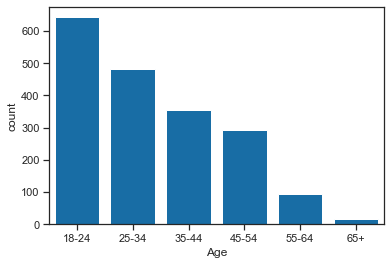

In [130]:
sns.countplot(x="Age", data=df, color='#0072BD', order = df['Age'].value_counts().index);

We got mostly young people from age 18-35. We see clearly that the vast majority of the individuals is between 18 and 34 (60%), while the number of observations is decreasing significantly for those inidividuals that are 54 or older.

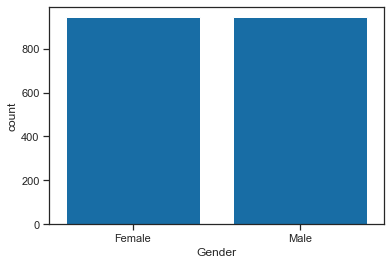

In [131]:
sns.countplot(x="Gender", data=df, color='#0072BD');

We have a perfect 50/50 split betwenn male and female observations

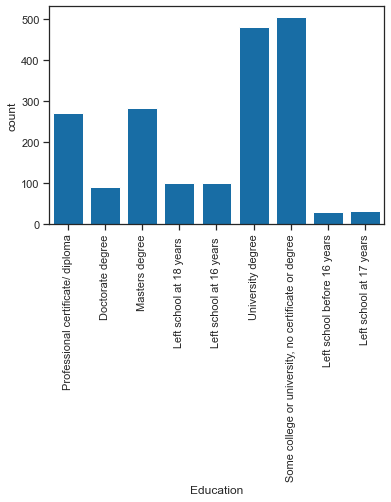

In [132]:
sns.countplot(x="Education", data=df, color='#0072BD')
plt.xticks(rotation=90);

More than a quarter of the observed individuals hold at least a degree from one college or university. Summing also the University, Masters degree as well as Professional diploma it's getting pretty obvious that we have an extremly well educated population here, who won't represent the overall population of the countries in focus.

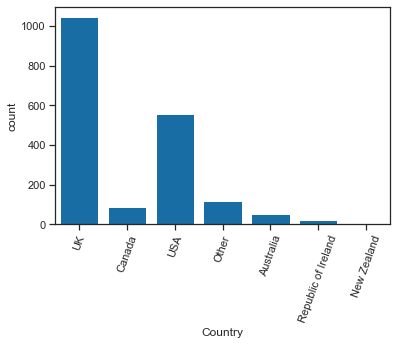

In [133]:
sns.countplot(x="Country", data=df, color='#0072BD')
plt.xticks(rotation=70);

We got only English speaking countries. 

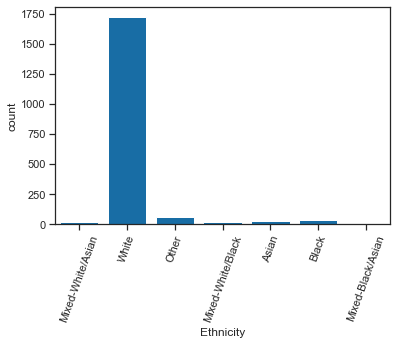

In [134]:
sns.countplot(x="Ethnicity", data=df, color='#0072BD')
plt.xticks(rotation=70);

As already said when checking the education feature the sample populations seems to be extremly biased. More than 91 % white individuals do not represent the overall population of the participating countries.


In [168]:
# create function to have multiple dataframes plotted side by side
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
    
# show occurrences and percentages
age_df = pd.DataFrame(df.Age.value_counts())
age_df['percentage'] = round(((age_df.Age / age_df.Age.sum())*100), 0)


gender_df = pd.DataFrame(df.Gender.value_counts())
gender_df['percentage'] = round(((gender_df.Gender / gender_df.Gender.sum())*100), 0)

ed_df = pd.DataFrame(df.Education.value_counts())
ed_df['percentage'] = round(((ed_df.Education / ed_df.Education.sum())*100), 0)

eth_df = pd.DataFrame(df.Ethnicity.value_counts())
eth_df['percentage'] = round(((eth_df.Ethnicity / eth_df.Ethnicity.sum())*100), 0)


display_side_by_side(age_df, gender_df, ed_df, eth_df)


Age 
 percentage 
 
 
 
 
 18-24 
 643 
 34.0 
 
 
 25-34 
 481 
 26.0 
 
 
 35-44 
 356 
 19.0 
 
 
 45-54 
 294 
 16.0 
 
 
 55-64 
 93 
 5.0 
 
 
 65+ 
 18 
 1.0 
 
 
 
 
 
 
 Gender 
 percentage 
 
 
 
 
 Male 
 943 
 50.0 
 
 
 Female 
 942 
 50.0 
 
 
 
 
 
 
 Education 
 percentage 
 
 
 
 
 Some college or university, no certificate or degree 
 506 
 27.0 
 
 
 University degree 
 480 
 25.0 
 
 
 Masters degree 
 283 
 15.0 
 
 
 Professional certificate/ diploma 
 270 
 14.0 
 
 
 Left school at 18 years 
 100 
 5.0 
 
 
 Left school at 16 years 
 99 
 5.0 
 
 
 Doctorate degree 
 89 
 5.0 
 
 
 Left school at 17 years 
 30 
 2.0 
 
 
 Left school before 16 years 
 28 
 1.0 
 
 
 
 
 
 
 Ethnicity 
 percentage 
 
 
 
 
 White 
 1720 
 91.0 
 
 
 Other 
 63 
 3.0 
 
 
 Black 
 33 
 2.0 
 
 
 Asian 
 26 
 1.0 
 
 
 Mixed-White/Asian 
 20 
 1.0 
 
 
 Mixed-White/Black 
 20 
 1.0 
 
 
 Mixed-Black/Asian 
 3 
 0.0

**Important observation:** The distribution of ethnicity and education in our dataset doesn't represent the overall distribution for the population in those countries. Therefor we'll have to be extremly carefull when concluding the results of our observations!

## Explore Psychometrics 

**From wikipidia**

In psychological trait theory, the Big Five personality traits, also known as the five-factor model (FFM) and the OCEAN model, is a suggested taxonomy, or grouping, for personality traits,[1] developed from the 1980s onwards. When factor analysis (a statistical technique) is applied to personality survey data, it reveals semantic associations: some words used to describe aspects of personality are often applied to the same person. For example, someone described as conscientious is more likely to be described as "always prepared" rather than "messy". These associations suggest five broad dimensions used in common language to describe the human personality and psyche.

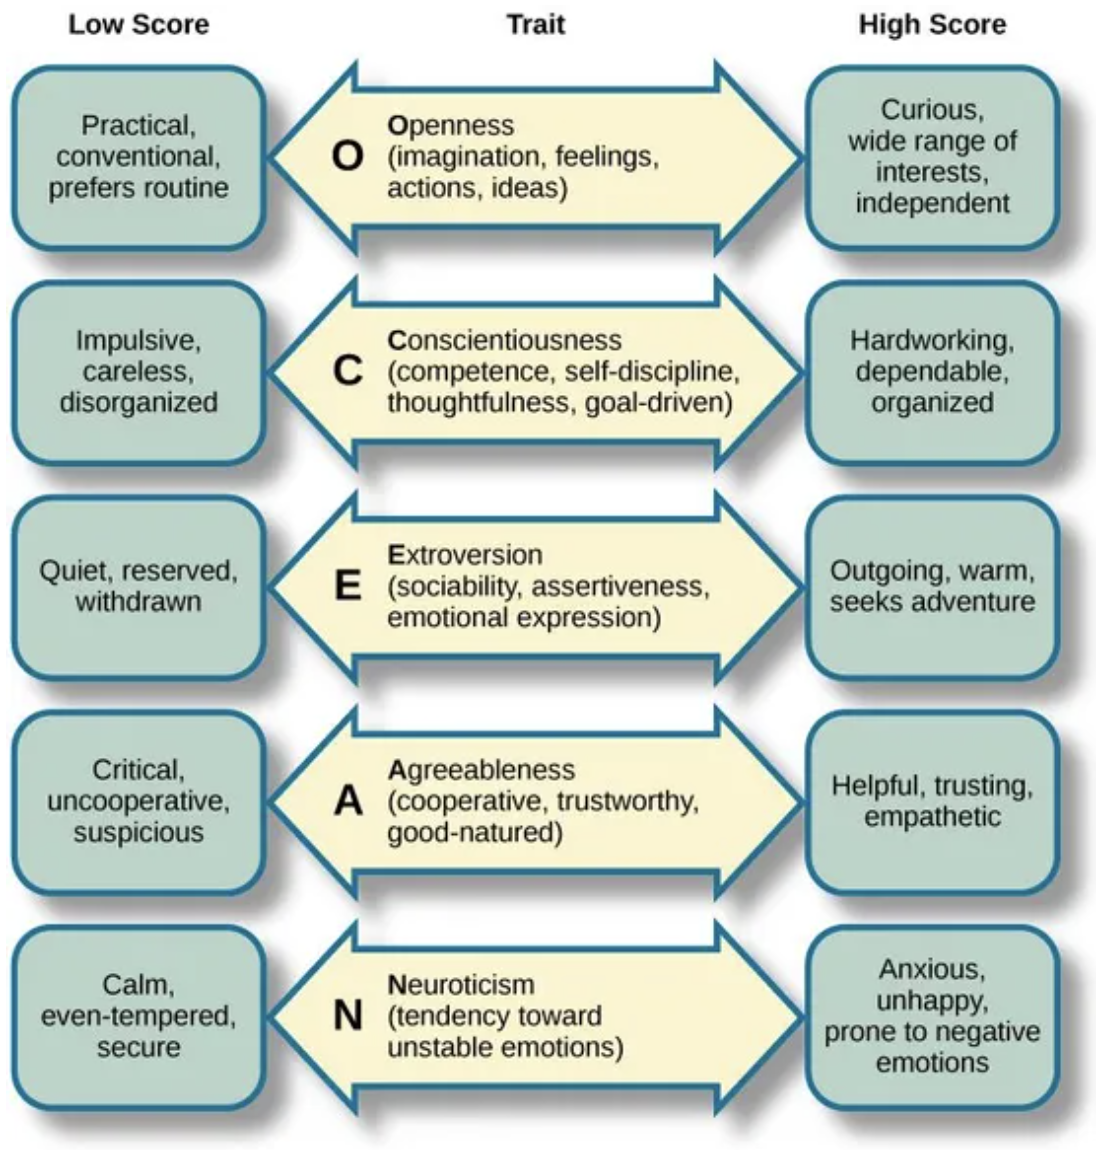


The theory identifies five factors:

- openness to experience (inventive/curious vs. consistent/cautious)
- conscientiousness (efficient/organized vs. extravagant/careless)
- extraversion (outgoing/energetic vs. solitary/reserved)
- agreeableness (friendly/compassionate vs. challenging/callous)
- neuroticism (sensitive/nervous vs. resilient/confident)

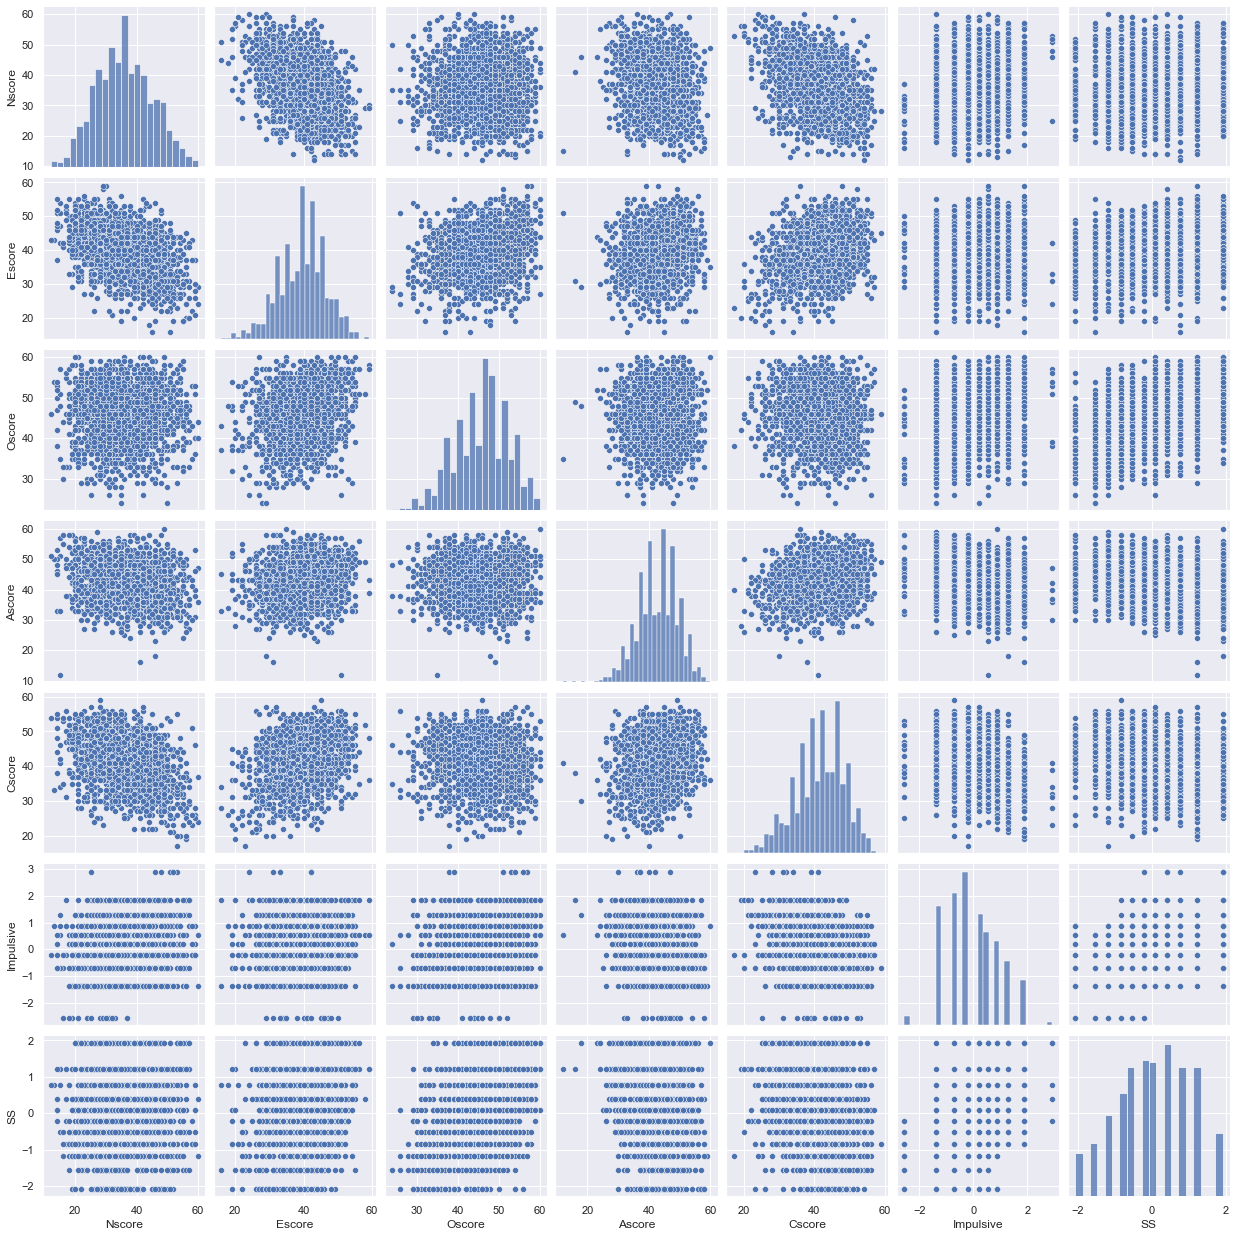

In [163]:
psy_df = pd.DataFrame(data=df, columns=psychometrics)
personality_dum=pd.get_dummies(psy_df.copy())

sns.pairplot(psy_df)

plt.savefig('figures/psychometrics_pairplot.png')

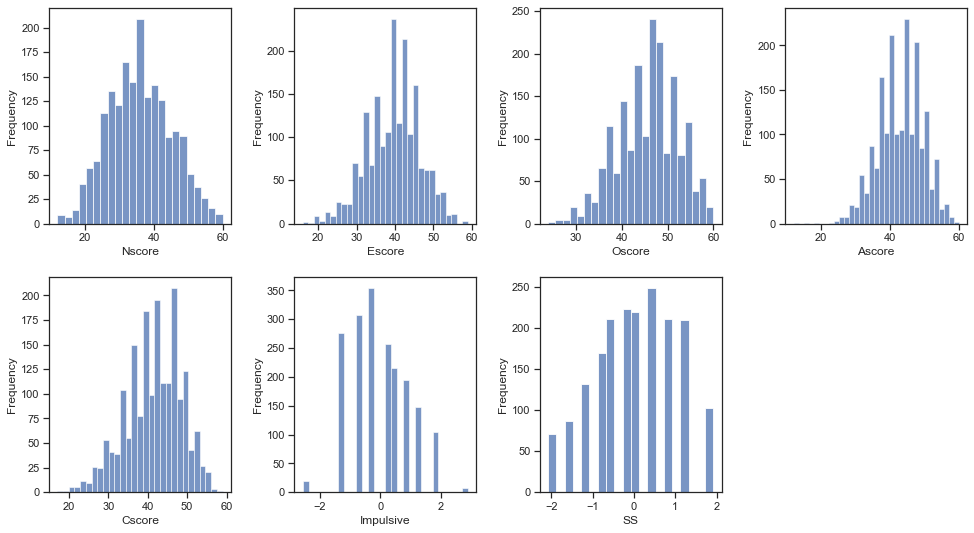

In [136]:
plt.figure(figsize=(15,8))
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

for index, feature in enumerate(psy_df.columns):
    plt.subplot(2, 4, index+1)
    plt.ylabel("Frequency")
    sns.histplot(psy_df[feature])

In [137]:
psy_df.describe().T

count       mean       std       min       25%       50%  \
Nscore     1885.0  35.921485  9.135869  12.00000  29.00000  36.00000   
Escore     1885.0  39.576127  6.771769  16.00000  35.00000  40.00000   
Oscore     1885.0  45.762334  6.579641  24.00000  41.00000  46.00000   
Ascore     1885.0  42.866313  6.438106  12.00000  39.00000  43.00000   
Cscore     1885.0  41.437135  6.966625  17.00000  37.00000  42.00000   
Impulsive  1885.0   0.007216  0.954435  -2.55524  -0.71126  -0.21712   
SS         1885.0  -0.003292  0.963701  -2.07848  -0.52593   0.07987   

                75%       max  
Nscore     42.00000  60.00000  
Escore     44.00000  59.00000  
Oscore     51.00000  60.00000  
Ascore     48.00000  60.00000  
Cscore     46.00000  59.00000  
Impulsive   0.52975   2.90161  
SS          0.76540   1.92173

It seems that we have for all the scores more or less a standard deviation of 1 and from the graphs we see that they are kinda normal distributed. So we are talking about standard normal distribution and if we have a closer look at our source for example for the nscore(how neurotic is a person) we have a scale from 1 to 60 and the people from our dataset are around 20-40. The same goes for the other 4 big of personality traits. So it seems that we deal with 'normal' people.   

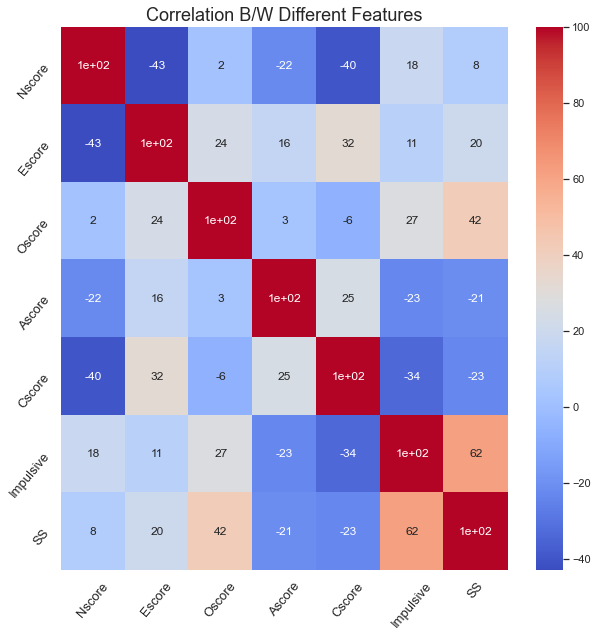

In [138]:
corrmat = round(psy_df.corr()*100,0)

plt.figure(figsize=(10,10))

sns.set(font_scale=1)
hm = sns.heatmap(corrmat,cmap = 'coolwarm',annot=True,
             yticklabels = psy_df.columns, xticklabels = psy_df.columns)
plt.xticks(fontsize=13,rotation=50)
plt.yticks(fontsize=13, rotation=50)
plt.title("Correlation B/W Different Features",fontsize=18)
plt.show()

*From this graph we can see that in general:*
- people that scored high in neuroticism, score low in extroversion and consciousness.
- Impulsive people score high in Openness and low in Agreeableness and consciousness
- Extroverts score high in Openness and consciousness
- Sensession seeking people are very impulsive, score high to openness and relatively low in Agreeableness and consciousness 

## Explore Substance Usage 

We know from our source:
- CL0 Never Used 
- CL1 Used over a Decade Ago 
- CL2 Used in Last Decade 
- CL3 Used in Last Year 
- CL4 Used in Last Month 
- CL5 Used in Last Week 
- CL6 Used in Last Day 

In [139]:
df_users = df.copy()
df.head()

Age  Gender                          Education Country  \
0  35-44  Female  Professional certificate/ diploma      UK   
1  25-34    Male                   Doctorate degree      UK   
2  35-44    Male  Professional certificate/ diploma      UK   
3  18-24  Female                     Masters degree      UK   
4  35-44  Female                   Doctorate degree      UK   

           Ethnicity  Nscore  Escore  Oscore  Ascore  Cscore  ...  Ecstasy  \
0  Mixed-White/Asian    39.0    36.0    42.0    37.0    42.0  ...      CL0   
1              White    29.0    52.0    55.0    48.0    41.0  ...      CL4   
2              White    31.0    45.0    40.0    32.0    34.0  ...      CL0   
3              White    34.0    34.0    46.0    47.0    46.0  ...      CL0   
4              White    43.0    28.0    43.0    41.0    50.0  ...      CL1   

   Heroin Ketamine Legalh  LSD Meth Shrooms Nicotine Semer  VSA  
0     CL0      CL0    CL0  CL0  CL0     CL0      CL2   CL0  CL0  
1     CL0      CL2    CL0  CL2  CL3     CL0      CL4   CL0  CL0  
2     CL0      CL0    CL0  CL0  CL0     CL1      CL0   CL0  CL0  
3     CL0      CL2    CL0  CL0  CL0     CL0      CL2   CL0  CL0  
4     CL0      CL0    CL1  CL0  CL0     CL2      CL2   CL0  CL0  

[5 rows x 31 columns]

In [140]:
drugs_col = df_users.columns[12:]
drugs_use = ['use_'+i for i in drugs_col]

In [142]:
for column in drugs_col:
    le = LabelEncoder()
    df_users[column] = le.fit_transform(df_users[column])

In [174]:
#make a new column for each drug which contain the information that a user is using that drug or not
for i in range(len(drugs_col)):
    df_users.loc[(df_users[drugs_col[i]] <= 2),drugs_use[i]] = 0
    df_users.loc[(df_users[drugs_col[i]] < 2),drugs_use[i]] = 1

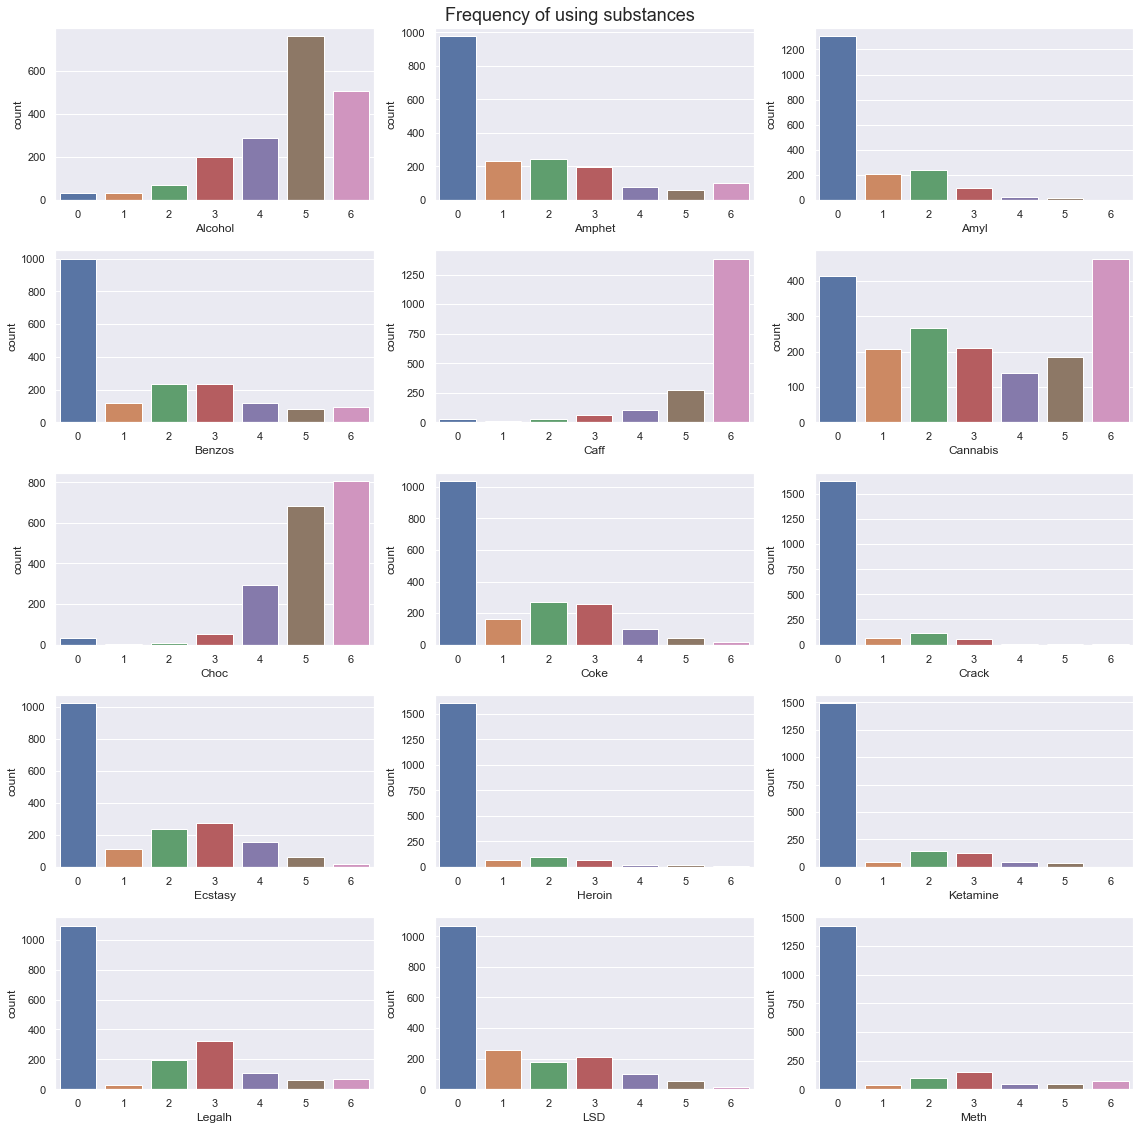

In [175]:
fig, axes = plt.subplots(5,3,figsize = (16,16))
fig.suptitle("Frequency of using substances",fontsize=18)
k=0
for i in range(5):
    for j in range(3):
        sns.countplot(x=drugs_col[k], data=df_users ,ax=axes[i][j],) 
        k+=1 

plt.tight_layout()
plt.show()

# Feature Engineering

## Classify drug usage 

In [169]:
count_of_users = []
count_of_non_users = []

In [146]:
for i in range(len(drugs_col)):
    s = df_users.groupby([drugs_use[i]])[drugs_col[i]].count()
    count_of_users.append(s[1])
    count_of_non_users.append(s[0])

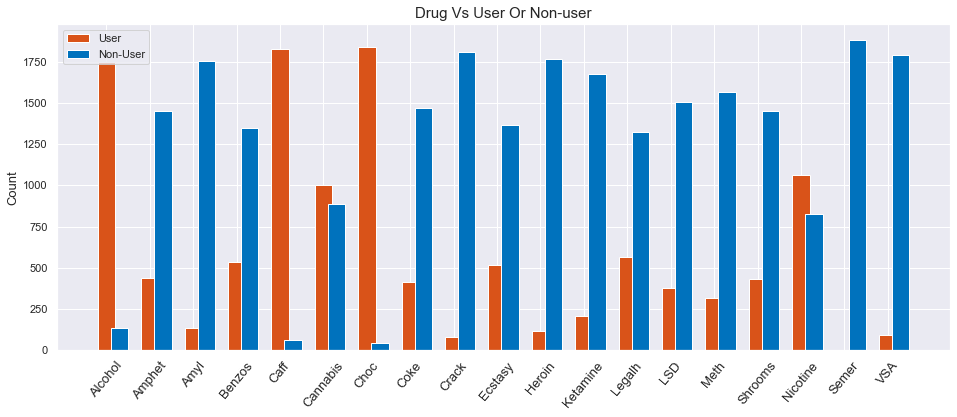

In [147]:
bins = np.arange(1,20,1)
plt.figure(figsize=(16,6))
plt.bar(bins,count_of_users,width=0.4,label ='User', color='#D95319')
plt.bar(bins+.30,count_of_non_users,width=0.4,label ='Non-User', color='#0072BD')
plt.xticks(bins,drugs_col,rotation=50,fontsize=13)
plt.ylabel("Count",fontsize=13)
plt.title("Drug Vs User Or Non-user",fontsize=15)
plt.legend();

## Separation of soft and hard drugs 

We create a distinction of soft and hard drugs, based on the differentation of the Amsterdam Info website: 
https://www.amsterdam.info/drugs/#:~:text=Soft%20drugs%20as%20cannabis%20in,so%20called%20%22personal%20use%22.

In [177]:
soft_use = df_users.loc[:, ['use_Alcohol',
                            'use_Nicotine', 'use_Cannabis', 'use_Shrooms']]
hard_col_use = [i for i in drugs_use if i not in [
                'use_Alcohol', 'use_Nicotine', 'use_Cannabis',
                'use_Caff', 'use_Choc', 'use_Shrooms']
               ]
hard_use = df_users.loc[:, hard_col_use]

In [153]:
soft= df_users.loc[:,['Alcohol','Nicotine', 'Cannabis','Shrooms']]
hard_col= [i for i in drugs_col if i not in ['Alcohol','Nicotine', 'Cannabis', 'Caff', 'Choc', 'Shrooms']]
hard= df_users.loc[:,hard_col]

In [156]:
hard_dum=pd.get_dummies(hard.copy())
pers_hard = psy_df.join(hard_dum) 

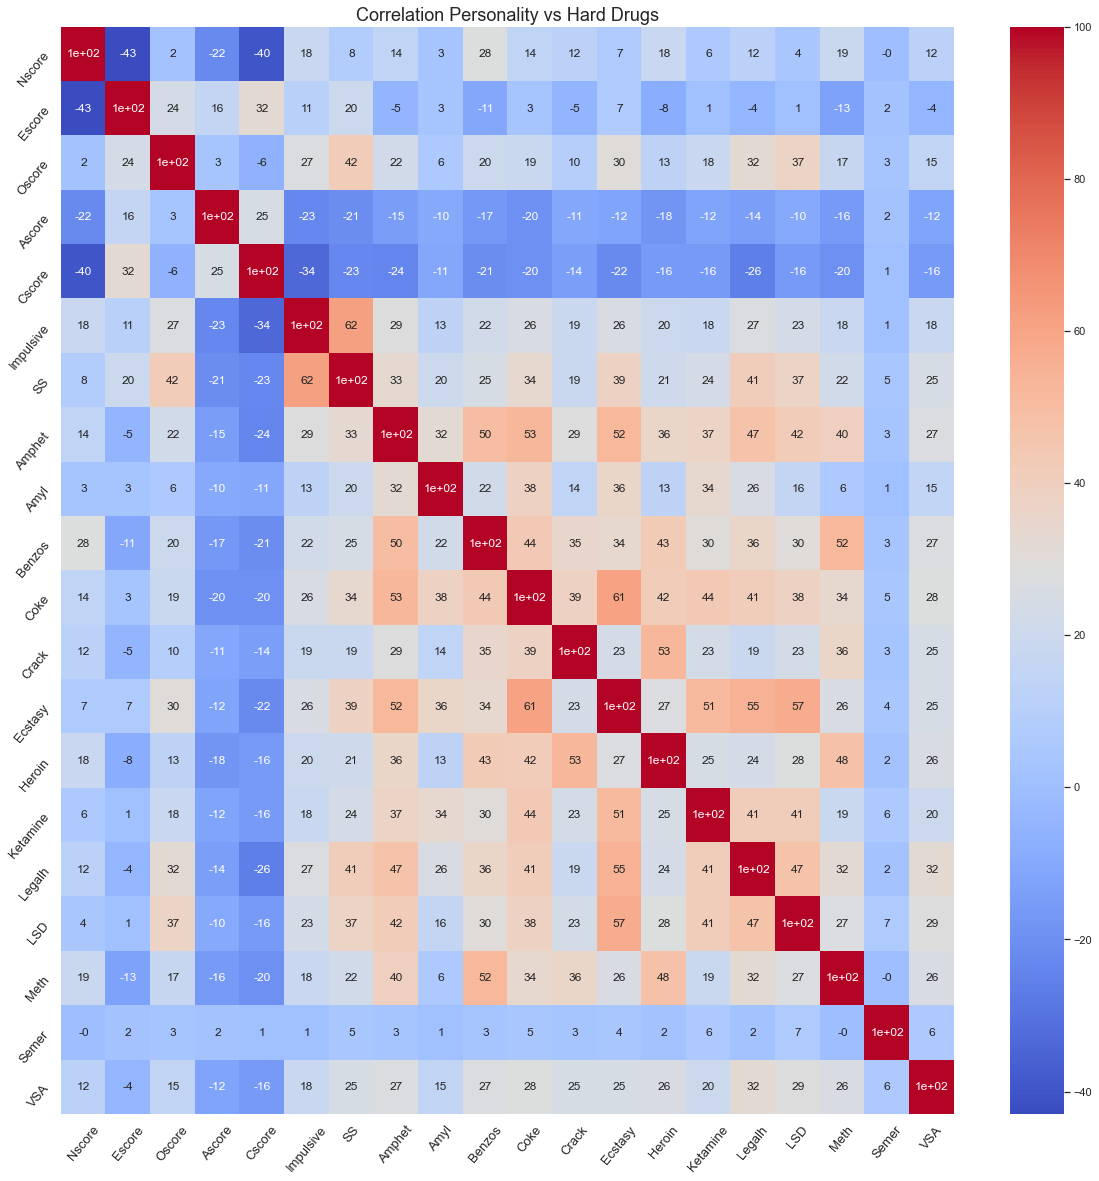

In [157]:
corrmat1 = round(pers_hard.corr()*100,0)

plt.figure(figsize=(20,20))

sns.set(font_scale=1)
hm = sns.heatmap(corrmat1,cmap = 'coolwarm',annot=True,
             yticklabels = pers_hard.columns, xticklabels = pers_hard.columns)
plt.xticks(fontsize=13,rotation=50)
plt.yticks(fontsize=13, rotation=50)
plt.title("Correlation Personality vs Hard Drugs",fontsize=18)
plt.show();

In [160]:
soft_plus = df_users.loc[:,['Alcohol','Nicotine', 'Cannabis', 'Caff', 'Choc', 'Shrooms']] # soft + Caffeine and chocolate
soft_plus_dum=pd.get_dummies(soft_plus.copy())
pers_soft_plus = psy_df.join(soft_plus_dum) 

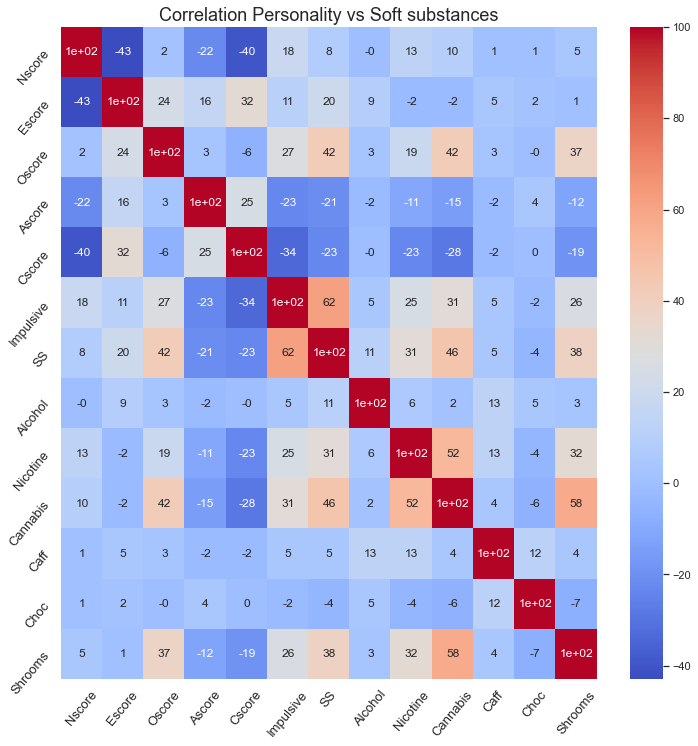

In [161]:
corrmat1 = round(pers_soft_plus.corr()*100,0)

plt.figure(figsize=(12,12))

sns.set(font_scale=1)
hm = sns.heatmap(corrmat1,cmap = 'coolwarm',annot=True,
             yticklabels = pers_soft_plus.columns, xticklabels = pers_soft_plus.columns)
plt.xticks(fontsize=13,rotation=50)
plt.yticks(fontsize=13, rotation=50)
plt.title("Correlation Personality vs Soft substances",fontsize=18)
plt.show()

## Overall usage of hard / soft drugs 

In [ ]:


df_users['soft_drug_usage'] = np.where((df[soft]))

In [179]:
soft_use

use_Alcohol  use_Nicotine  use_Cannabis  use_Shrooms
0             1.0           0.0           1.0          1.0
1             1.0           1.0           1.0          1.0
2             1.0           1.0           1.0          1.0
3             1.0           0.0           0.0          1.0
4             1.0           0.0           1.0          0.0
5             0.0           1.0           1.0          1.0
6             1.0           1.0           1.0          1.0
7             1.0           1.0           1.0          1.0
8             1.0           1.0           1.0          1.0
9             1.0           1.0           1.0          1.0
10            1.0           0.0           0.0          1.0
11            1.0           1.0           1.0          0.0
12            1.0           1.0           1.0          1.0
13            1.0           1.0           1.0          1.0
14            1.0           1.0           1.0          1.0
15            1.0           1.0           1.0          1.0
16            1.0           1.0           1.0          1.0
17            1.0           1.0           1.0          1.0
18            1.0           1.0           1.0          1.0
19            1.0           1.0           1.0          1.0
20            1.0           1.0           0.0          1.0
21            1.0           1.0           1.0          1.0
22            1.0           1.0           1.0          1.0
23            1.0           1.0           0.0          1.0
24            1.0           1.0           1.0          1.0
25            1.0           1.0           1.0          0.0
26            1.0           1.0           1.0          1.0
27            1.0           0.0           1.0          1.0
28            1.0           1.0           1.0          1.0
29            1.0           1.0           1.0          1.0
...           ...           ...           ...          ...
1855          1.0           0.0           1.0          1.0
1856          1.0           1.0           1.0          1.0
1857          1.0           1.0           1.0          1.0
1858          1.0           1.0           1.0          1.0
1859          1.0           1.0           1.0          1.0
1860          1.0           0.0           1.0          0.0
1861          1.0           1.0           1.0          0.0
1862          1.0           1.0           1.0          1.0
1863          1.0           1.0           1.0          1.0
1864          1.0           1.0           1.0          1.0
1865          1.0           1.0           1.0          1.0
1866          1.0           1.0           1.0          1.0
1867          1.0           1.0           1.0          0.0
1868          0.0           1.0           1.0          1.0
1869          1.0           1.0           1.0          1.0
1870          1.0           1.0           1.0          1.0
1871          1.0           1.0           1.0          1.0
1872          1.0           1.0           1.0          1.0
1873          1.0           1.0           1.0          1.0
1874          1.0           1.0           1.0          1.0
1875          1.0           1.0           1.0          1.0
1876          1.0           0.0           1.0          1.0
1877          1.0           1.0           1.0          1.0
1878          1.0           0.0           1.0          0.0
1879          1.0           1.0           1.0          1.0
1880          1.0           1.0           1.0          1.0
1881          1.0           1.0           1.0          1.0
1882          1.0           1.0           1.0          0.0
1883          1.0           1.0           1.0          1.0
1884          1.0           1.0           1.0          1.0

[1885 rows x 4 columns]